In [297]:
import pandas as pd
import seaborn as sns
import numpy as np

In [298]:
df = pd.read_csv("C:/Users/harsh/Downloads/pgdai/lending case study/loan.csv")

C:\Users\harsh\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [299]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [300]:
df.shape

(39717, 111)

In [301]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

## Finding % of missing values for each cols. Removing cols having missing value greater than 60%

In [302]:
for col in df.columns:
    missing =  df[col].isnull().sum()/df[col].shape[0]
    if missing > 0.6:
        df.drop(col, 1, inplace = True)
    elif missing > 0.0:
        print(col, missing)

emp_title 0.06191303472064859
emp_length 0.027066495455346576
desc 0.3258050708764509
title 0.00027695948838029054
revol_util 0.0012589067653649571
last_pymnt_d 0.001787647606818239
last_credit_pull_d 5.0356270614598286e-05
collections_12_mths_ex_med 0.0014099755772087519
chargeoff_within_12_mths 0.0014099755772087519
pub_rec_bankruptcies 0.017549160309187503
tax_liens 0.0009819472769846665


In [303]:
df.shape

(39717, 54)

## Ways of Imputing Null values in Columns having less than 60% null values 

In [304]:
df['emp_title'].isnull().sum()

2459

In [305]:
# Can impute emp_title col with mode since it has a categorical values 
df['emp_title'].describe() 
# US ARMY value can be imputed  

count       37258
unique      28820
top       US Army
freq          134
Name: emp_title, dtype: object

In [306]:
df['emp_length'].isnull().sum()

1075

In [307]:
df['emp_length'].describe()

count         38642
unique           11
top       10+ years
freq           8879
Name: emp_length, dtype: object

In [308]:
df['title'].isnull().sum()

11

In [309]:
df['title'].describe()

count                  39706
unique                 19615
top       Debt Consolidation
freq                    2184
Name: title, dtype: object

## Removing Rows having Null values equal to or greater than 5

In [310]:
df['no_of_null'] = df.isnull().sum(axis = 1)

In [311]:
df['no_of_null'].describe()

count    39717.000000
mean         0.439510
std          0.620915
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          6.000000
Name: no_of_null, dtype: float64

In [312]:
df = df[df['no_of_null'] < 5]

In [313]:
df.shape

(39707, 55)

## Converting datatypes of Cols 

In [314]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens', 'no_of_null'],
      dtype='object')

#### Converting interest rate to float type 


In [315]:
df['int_rate'].dtype

dtype('O')

In [316]:
df['int_rate'] = df['int_rate'].apply(lambda x: x[:-1])
df['int_rate'] = df['int_rate'].astype(float)

In [317]:
df['int_rate'].describe()

count    39707.000000
mean        12.022077
std          3.724817
min          5.420000
25%          9.250000
50%         11.860000
75%         14.590000
max         24.590000
Name: int_rate, dtype: float64

C:\Users\harsh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='int_rate'>

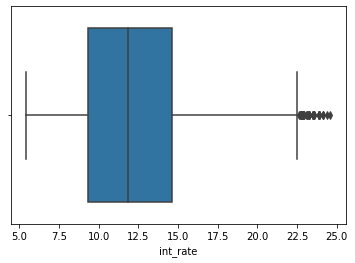

In [329]:
# Checking for Outliers
sns.boxplot(df['int_rate'])

#### Converting emp_length to int type 


In [318]:
df['emp_length'].dtype

dtype('O')

In [319]:
df['emp_length'].value_counts()


10+ years    8879
< 1 year     4575
2 years      4388
3 years      4095
4 years      3435
5 years      3282
1 year       3239
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [320]:
df['emp_length'].isnull().sum()

1075

In [321]:
# dropping rows where employee length is null
df = df[~df['emp_length'].isnull()]

In [322]:
df['emp_length'] = df['emp_length'].apply(lambda x: '0' if x == '< 1 year' else ( '10' if x == '10+ years' else x[0] ))

In [324]:
df['emp_length'] = df['emp_length'].astype(int)

In [326]:
df['emp_length'].describe()

count    38632.000000
mean         4.974607
std          3.562262
min          0.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: emp_length, dtype: float64

<AxesSubplot:xlabel='emp_length', ylabel='Count'>

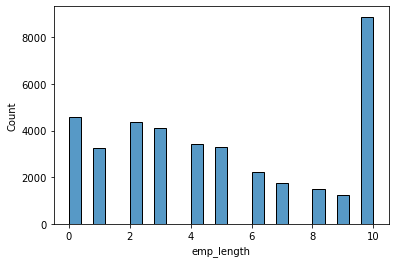

In [327]:
sns.histplot(df['emp_length'])

## Removing unnecessary cols as per domain requirement

In [332]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens', 'no_of_null'],
      dtype='object')

In [ ]:
# Necessary columns: 
# Cols related to applicant : Grade, subgrade, emp_title, emp_length, home_ownership, annual_inc, verification_status, dti
# Cols related to application : issue_d, pymnt_plan, desc, purpose, title, application_type, int_rate, term, loan_amnt

In [336]:
df1 = df[['loan_amnt','term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status','purpose',
       'title', 'addr_state', 'dti','total_pymnt' ]]

In [337]:
df1.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,total_pymnt
0,5000,36 months,10.65,162.87,B,B2,NaN,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,AZ,27.65,5863.155187
1,2500,60 months,15.27,59.83,C,C4,Ryder,0,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,GA,1.00,1008.710000
2,2400,36 months,15.96,84.33,C,C5,NaN,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,IL,8.72,3005.666844
3,10000,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,CA,20.00,12231.890000
4,3000,60 months,12.69,67.79,B,B5,University Medical Group,1,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,OR,17.94,3513.330000


In [ ]:
df1['loan_status'].value_counts()

In [339]:
df1 = df1[df1['loan_status'] != 'Current']

In [340]:
df1['loan_status'] = df1['loan_status'].apply(lambda x: 1 if x =='Charged Off' else 0 )

In [344]:
df1.shape

(37534, 18)

In [352]:
df1['emp_title'].value_counts()

US Army                         131
Bank of America                 107
IBM                              65
AT&T                             57
Kaiser Permanente                56
                               ... 
Lichten & Liss-Riordan, P.C.      1
sax macy fromm and company        1
AKER PHILADELPHIA SHIPYARD        1
Sunnrise Asiisted Living          1
Capital Tri-State                 1
Name: emp_title, Length: 27980, dtype: int64

In [354]:
#  Dropping emp_title col since it will not help in analysing 
df1 = df1.drop('emp_title', 1)

In [357]:
df1['purpose'].value_counts()

debt_consolidation    17231
credit_card            4719
other                  3578
home_improvement       2666
major_purchase         2002
car                    1413
small_business         1406
wedding                 890
medical                 633
moving                  534
vacation                338
house                   336
educational             299
renewable_energy         88
Name: purpose, dtype: int64

In [358]:
df1['title'].value_counts()

Debt Consolidation                          2000
Debt Consolidation Loan                     1549
Personal Loan                                614
Consolidation                                475
debt consolidation                           446
                                            ... 
HOME IMPROVE LOAN NEEDED TO GET KIDS OUT       1
Pay Off Credit Cards Reduce Debt               1
BAS Consolidation                              1
IT Franchise Purchase                          1
My Family Emergency Loan                       1
Name: title, Length: 18096, dtype: int64

In [359]:
#  Dropping title col since we have similar column named purpose which has 14 uniques categories.
df1 = df1.drop('title', 1)

In [360]:
# Cleaning Term col
df1['term'].isnull().sum()

0

In [361]:
df1['term'] = df1['term'].apply(lambda x: x.split(" ")[-2])

In [362]:
df1.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,total_pymnt
1,2500,60,15.27,59.83,C,C4,0,RENT,30000.0,Source Verified,Dec-11,1,car,GA,1.00,1008.710000
3,10000,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec-11,0,other,CA,20.00,12231.890000
5,5000,36,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,Dec-11,0,wedding,AZ,11.20,5632.210000
6,7000,60,15.96,170.08,C,C5,8,RENT,47004.0,Not Verified,Dec-11,0,debt_consolidation,NC,23.51,10110.840000
7,3000,36,18.64,109.43,E,E1,9,RENT,48000.0,Source Verified,Dec-11,0,car,CA,5.35,3939.135294


### Univariate Analysis

In [380]:
# Checking Outliers in Annual_inc
df1['annual_inc'].describe()

count     36045.000000
mean      67223.249230
std       39325.522748
min        4000.000000
25%       41000.000000
50%       59578.440000
75%       82000.000000
max      399996.000000
Name: annual_inc, dtype: float64

C:\Users\harsh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='annual_inc'>

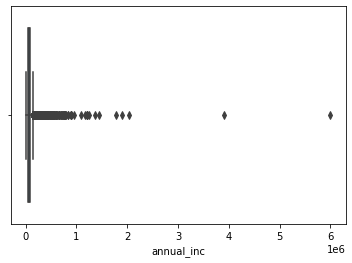

In [367]:
sns.boxplot(df1['annual_inc'] )

In [372]:
df1= df1[df1['annual_inc']< 400000]

C:\Users\harsh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='annual_inc'>

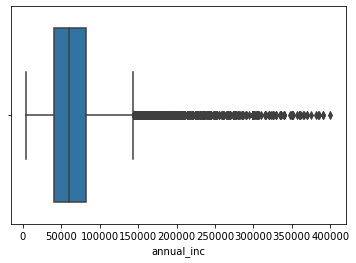

In [373]:
sns.boxplot(df1['annual_inc'] )

C:\Users\harsh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan_amnt'>

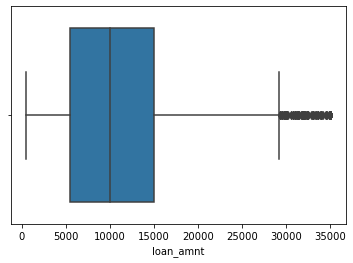

In [378]:
# Checking distribution of loan amount
sns.boxplot(df1['loan_amnt'] )

<AxesSubplot:xlabel='term', ylabel='Count'>

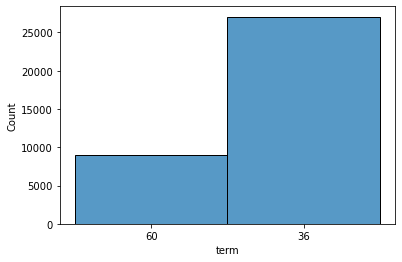

In [384]:
sns.histplot(df1['term'])

<AxesSubplot:xlabel='home_ownership', ylabel='Count'>

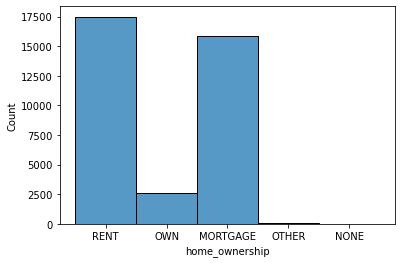

In [387]:
sns.histplot(df1['home_ownership'])

<AxesSubplot:xlabel='verification_status', ylabel='Count'>

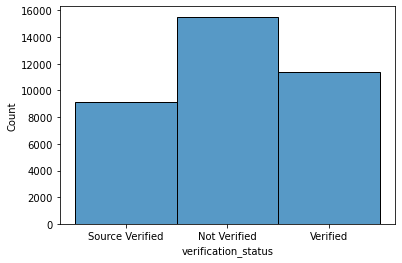

In [388]:
sns.histplot(df1['verification_status'])

<AxesSubplot:xlabel='purpose', ylabel='Count'>

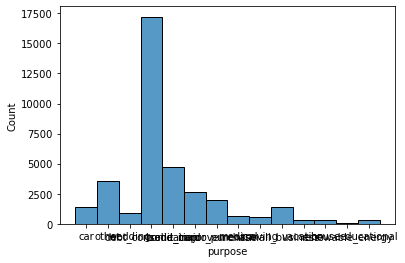

In [389]:
sns.histplot(df1['purpose'])

In [397]:
df1['purpose'].value_counts()

debt_consolidation    17202
credit_card            4711
other                  3571
home_improvement       2647
major_purchase         1993
car                    1413
small_business         1402
wedding                 887
medical                 630
moving                  533
vacation                338
house                   334
educational             298
renewable_energy         86
Name: purpose, dtype: int64

C:\Users\harsh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='dti'>

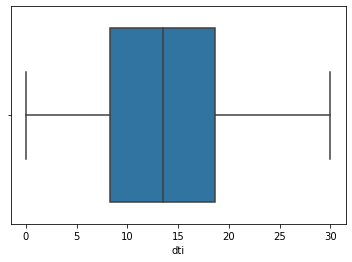

In [398]:
sns.boxplot(df1['dti'])

C:\Users\harsh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='int_rate'>

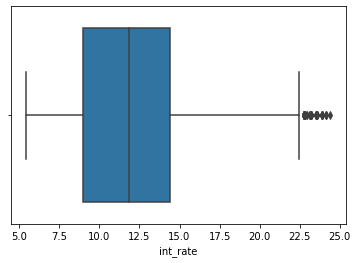

In [399]:
sns.boxplot(df1['int_rate'])

In [374]:
df1['addr_state'].value_counts()

CA    6489
NY    3464
FL    2583
TX    2500
NJ    1704
IL    1389
PA    1383
VA    1290
GA    1277
MA    1213
OH    1116
MD     974
AZ     767
WA     741
CO     701
NC     701
CT     662
MI     650
MO     619
MN     565
NV     445
SC     429
AL     405
OR     404
WI     402
LA     394
KY     296
OK     274
KS     236
UT     234
AR     220
DC     207
RI     186
NM     166
WV     158
HI     155
NH     151
DE     108
WY      76
AK      73
MT      71
SD      57
VT      49
MS      18
TN      16
IN       9
NE       5
ID       5
IA       5
ME       3
Name: addr_state, dtype: int64

In [400]:
df1['loan_amnt'].describe()

count    36045.000000
mean     11091.127063
std       7299.707314
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [513]:
df1['loan_amnt_bin'] = pd.cut(df1['loan_amnt'], bins=[465.5, 1000, 5000, 25000,30000, 35000])
df1['loan_amnt_bin'].value_counts(1)

(5000.0, 25000.0]     0.723429
(1000.0, 5000.0]      0.232876
(30000.0, 35000.0]    0.018338
(25000.0, 30000.0]    0.018172
(465.5, 1000.0]       0.007185
Name: loan_amnt_bin, dtype: float64

In [517]:
# sns.barplot(df1['loan_amnt_bin'].unique(), df1['loan_amnt_bin'].value_counts(1))

In [509]:
#  Segment univariate
df1.groupby(['loan_amnt_bin'])['loan_status'].value_counts(1)

loan_amnt_bin       loan_status
(465.5, 1000.0]     0              0.876448
                    1              0.123552
(1000.0, 5000.0]    0              0.866214
                    1              0.133786
(5000.0, 25000.0]   0              0.859258
                    1              0.140742
(25000.0, 30000.0]  0              0.795420
                    1              0.204580
(30000.0, 35000.0]  0              0.757943
                    1              0.242057
Name: loan_status, dtype: float64

In [479]:
df1['dti_bin'] = pd.cut(df1['dti'], bins=[0,1,10,20,30],include_lowest=True)
df1['dti_bin'].value_counts().sort_index()

(-0.001, 1.0]      852
(1.0, 10.0]      10971
(10.0, 20.0]     17402
(20.0, 30.0]      6820
Name: dti_bin, dtype: int64

In [480]:
df1['dti_bin'].unique()

[(-0.001, 1.0], (10.0, 20.0], (20.0, 30.0], (1.0, 10.0]]
Categories (4, interval[float64]): [(-0.001, 1.0] < (1.0, 10.0] < (10.0, 20.0] < (20.0, 30.0]]

In [481]:
# sns.barplot(d1.unique(), d1.value_counts().sort_index())


In [482]:
#  Segment univariate
df1.groupby(['dti_bin'])['loan_status'].value_counts(1)

dti_bin        loan_status
(-0.001, 1.0]  0              0.883803
               1              0.116197
(1.0, 10.0]    0              0.878133
               1              0.121867
(10.0, 20.0]   0              0.851971
               1              0.148029
(20.0, 30.0]   0              0.837683
               1              0.162317
Name: loan_status, dtype: float64

In [377]:
df1.groupby(['grade', 'sub_grade'])['loan_status'].value_counts()

grade  sub_grade  loan_status
A      A1         0               990
                  1                23
       A2         0              1314
                  1                64
       A3         0              1580
                                 ... 
G      G3         1                18
       G4         0                41
                  1                12
       G5         0                17
                  1                 9
Name: loan_status, Length: 70, dtype: int64

C:\Users\harsh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan_amnt'>

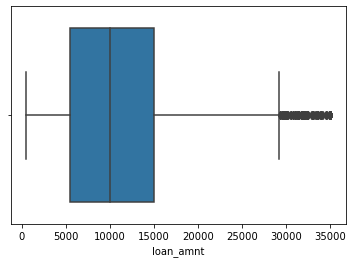

In [10]:
sns.boxplot(df['loan_amnt'])

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [13]:
df['loan_amt_grp'] = df['loan_amt_grp'].astype(int)

In [14]:
df.groupby('loan_amt_grp')['loan_status'].value_counts()

loan_amt_grp  loan_status
0             Fully Paid      6417
              Charged Off     1027
              Current           73
1             Fully Paid     10454
              Charged Off     1567
              Current          157
2             Fully Paid      7496
              Charged Off     1158
              Current          270
3             Fully Paid      3866
              Charged Off      785
              Current          209
4             Fully Paid      2530
              Charged Off      515
              Current          190
5             Fully Paid      1364
              Charged Off      326
              Current          108
6             Fully Paid       372
              Charged Off       99
              Current           55
7             Fully Paid       451
              Charged Off      150
              Current           78
Name: loan_status, dtype: int64

In [15]:
df = df[~df['emp_length'].isnull()]

In [16]:
df.shape

(38642, 112)

In [17]:
# df['emp_length'].apply(lambda x: x.split(' ')[-2])

In [18]:
df.groupby('emp_length')['loan_status'].value_counts()

emp_length  loan_status
1 year      Fully Paid     2713
            Charged Off     456
            Current          71
10+ years   Fully Paid     7157
            Charged Off    1331
            Current         391
2 years     Fully Paid     3724
            Charged Off     567
            Current          97
3 years     Fully Paid     3457
            Charged Off     555
            Current          83
4 years     Fully Paid     2880
            Charged Off     462
            Current          94
5 years     Fully Paid     2736
            Charged Off     458
            Current          88
6 years     Fully Paid     1861
            Charged Off     307
            Current          61
7 years     Fully Paid     1448
            Charged Off     263
            Current          62
8 years     Fully Paid     1232
            Charged Off     203
            Current          44
9 years     Fully Paid     1068
            Charged Off     158
            Current          32
< 1 year    Full

In [19]:
df.groupby('verification_status')['loan_status'].value_counts()

verification_status  loan_status
Not Verified         Fully Paid     14229
                     Charged Off     2049
                     Current          220
Source Verified      Fully Paid      8098
                     Charged Off     1396
                     Current          297
Verified             Fully Paid      9818
                     Charged Off     1954
                     Current          581
Name: loan_status, dtype: int64

In [20]:
df.groupby('home_ownership')['loan_status'].value_counts()
# Around 14% people default their loan in each category 

home_ownership  loan_status
MORTGAGE        Fully Paid     14350
                Charged Off     2245
                Current          617
NONE            Fully Paid         3
OTHER           Fully Paid        80
                Charged Off       18
OWN             Fully Paid      2370
                Charged Off      400
                Current           71
RENT            Fully Paid     15342
                Charged Off     2736
                Current          410
Name: loan_status, dtype: int64

In [21]:
df['total_pymnt_grp'] = df['total_pymnt']/5000

In [22]:
df['total_pymnt_grp'] = df['total_pymnt_grp'].astype(int)

In [23]:
df.groupby('total_pymnt_grp')['loan_status'].value_counts()
# 50% of people who pay less than 5000 tend to default the loan 
# Very Less People tend to default the loan who hv paid more than 25K  

total_pymnt_grp  loan_status
0                Fully Paid     5285
                 Charged Off    2734
                 Current          44
1                Fully Paid     9648
                 Charged Off    1454
                 Current         120
2                Fully Paid     7200
                 Charged Off     627
                 Current         141
3                Fully Paid     4235
                 Charged Off     297
                 Current         226
4                Fully Paid     2523
                 Current         168
                 Charged Off     145
5                Fully Paid     1526
                 Current         150
                 Charged Off      79
6                Fully Paid      852
                 Current         108
                 Charged Off      32
7                Fully Paid      427
                 Current          57
                 Charged Off      17
8                Fully Paid      250
                 Current          39
         

In [24]:
# df['term'].apply(lambda x: x.split(" ")[-2] )

In [25]:
df.groupby('term')['loan_status'].value_counts()
# More no of Defaulters in longer term loans

term        loan_status
 36 months  Fully Paid     25214
            Charged Off     3073
 60 months  Fully Paid      6931
            Charged Off     2326
            Current         1098
Name: loan_status, dtype: int64

In [26]:
df['int_rate'].describe()
# 10.99% most common ROI

count      38642
unique       371
top       10.99%
freq         932
Name: int_rate, dtype: object

In [28]:
df['int_rate'].head()

0    10.65
1    15.27
2    15.96
3    13.49
4    12.69
Name: int_rate, dtype: object

In [29]:
df['int_rate'] = df['int_rate'].astype(float)

In [30]:
df['int_rate'].describe()

count    38642.000000
mean        12.052427
std          3.716705
min          5.420000
25%          9.320000
50%         11.860000
75%         14.590000
max         24.590000
Name: int_rate, dtype: float64

C:\Users\harsh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='int_rate'>

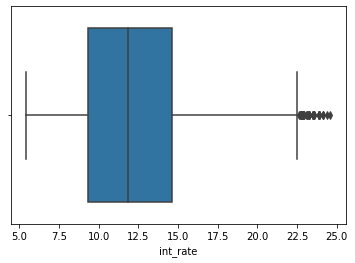

In [62]:
sns.boxplot(df['int_rate'])

In [31]:
df['int_rate_grp'] = df['int_rate']/1

In [32]:
df['int_rate_grp'] = df['int_rate_grp'].astype(int)

In [33]:
df['int_rate_grp'].value_counts()


11    4378
10    4230
7     4074
13    3950
12    3388
14    2685
15    2513
6     2368
9     2209
16    1986
8     1765
17    1386
5     1243
18     895
19     712
20     479
21     198
22     136
23      42
24       5
Name: int_rate_grp, dtype: int64

In [34]:
df.groupby('int_rate_grp')['loan_status'].value_counts()
# Higher the interest rate, higher chances of default loan

int_rate_grp  loan_status
5             Fully Paid     1196
              Charged Off      47
6             Fully Paid     2258
              Charged Off     108
              Current           2
7             Fully Paid     3828
              Charged Off     235
              Current          11
8             Fully Paid     1592
              Charged Off     149
              Current          24
9             Fully Paid     1982
              Charged Off     196
              Current          31
10            Fully Paid     3681
              Charged Off     459
              Current          90
11            Fully Paid     3655
              Charged Off     595
              Current         128
12            Fully Paid     2776
              Charged Off     500
              Current         112
13            Fully Paid     3243
              Charged Off     615
              Current          92
14            Fully Paid     2139
              Charged Off     460
              Current 

In [35]:
df['dti'] = df['dti']/3

In [36]:
df['dti'].describe()

count    38642.000000
mean         4.441703
std          2.222301
min          0.000000
25%          2.733333
50%          4.471667
75%          6.196667
max          9.996667
Name: dti, dtype: float64

In [37]:
df['dti_grp'] = df['dti'].astype(int)

In [38]:
df.groupby('dti_grp')['loan_status'].value_counts()
# Borrowers having Low DTI tend to default less

dti_grp  loan_status
0        Fully Paid     2334
         Charged Off     332
         Current          52
1        Fully Paid     3090
         Charged Off     408
         Current          71
2        Fully Paid     4034
         Charged Off     591
         Current         112
3        Fully Paid     4631
         Charged Off     708
         Current         168
4        Fully Paid     4916
         Charged Off     867
         Current         146
5        Fully Paid     4511
         Charged Off     802
         Current         171
6        Fully Paid     4009
         Charged Off     793
         Current         154
7        Fully Paid     3226
         Charged Off     649
         Current         129
8        Fully Paid     1128
         Charged Off     210
         Current          68
9        Fully Paid      266
         Charged Off      39
         Current          27
Name: loan_status, dtype: int64

In [39]:
df['purpose'].value_counts()

debt_consolidation    18242
credit_card            5000
other                  3833
home_improvement       2879
major_purchase         2115
small_business         1783
car                    1497
wedding                 934
medical                 668
moving                  559
house                   368
vacation                352
educational             317
renewable_energy         95
Name: purpose, dtype: int64

In [40]:
df.groupby('purpose')['loan_status'].value_counts()

purpose             loan_status
car                 Fully Paid      1293
                    Charged Off      155
                    Current           49
credit_card         Fully Paid      4389
                    Charged Off      510
                    Current          101
debt_consolidation  Fully Paid     14996
                    Charged Off     2679
                    Current          567
educational         Fully Paid       265
                    Charged Off       52
home_improvement    Fully Paid      2455
                    Charged Off      330
                    Current           94
house               Fully Paid       295
                    Charged Off       59
                    Current           14
major_purchase      Fully Paid      1869
                    Charged Off      211
                    Current           35
medical             Fully Paid       555
                    Charged Off      101
                    Current           12
moving              Fully

In [41]:
#  annual_inc

In [42]:
df['annual_inc'].describe()

count    3.864200e+04
mean     6.960828e+04
std      6.425320e+04
min      4.000000e+03
25%      4.140000e+04
50%      6.000000e+04
75%      8.319999e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

C:\Users\harsh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='annual_inc'>

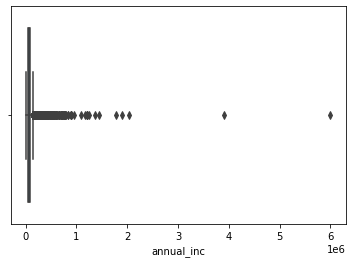

In [43]:
# checking Outliers
sns.boxplot(df['annual_inc'] )

In [44]:
df= df[df['annual_inc']< 500000]

C:\Users\harsh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='annual_inc'>

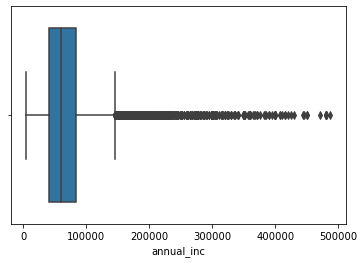

In [45]:
sns.boxplot(df['annual_inc'] )

In [46]:
df['annual_inc'].describe()

count     38571.000000
mean      68054.277311
std       41274.239561
min        4000.000000
25%       41200.000000
50%       60000.000000
75%       83000.000000
max      487000.000000
Name: annual_inc, dtype: float64

In [59]:
df['annual_inc_grp'] = df['annual_inc']/50000

In [60]:
df['annual_inc_grp'] = df['annual_inc_grp'].astype(int)

In [61]:
df.groupby('annual_inc_grp')['loan_status'].value_counts()
# People having less income tend to default their loan more

annual_inc_grp  loan_status
0               Fully Paid     11389
                Charged Off     2280
                Current          301
1               Fully Paid     15466
                Charged Off     2481
                Current          579
2               Fully Paid      3784
                Charged Off      452
                Current          137
3               Fully Paid       896
                Charged Off      117
                Current           62
4               Fully Paid       312
                Charged Off       35
                Current            8
5               Fully Paid       106
                Charged Off       11
                Current            6
6               Fully Paid        80
                Charged Off        6
                Current            1
7               Fully Paid        28
                Charged Off        4
                Current            2
8               Fully Paid        17
                Charged Off        1
9         